# Preliminary inspection of MiniLM embeddings
2022-11-03
______________________


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from tqdm import tqdm

Let's load up the category information and the embedding.

In [25]:
metadata_df = pd.read_csv('podcasts-no-audio-13GB/metadata.tsv', sep='\t')
minilm_df = pd.read_csv('transcript_embeddings_minilm-l6-v2.csv')

In [26]:
metadata_df = metadata_df[metadata_df.episode_filename_prefix.isin(minilm_df.episode_id.values)]
metadata_df.reset_index(inplace=True, drop=True)
# metadata_df

Let's isolate a couple of categories and plot it in 2D using PCA to reduce down the embedding space (we could use t-SNE instead but PCA will do for now).

In [27]:
pca = PCA(n_components=2)
pca.fit(minilm_df[minilm_df.columns[4:]])

fiction_embeddings_df = minilm_df[minilm_df.category=='fiction']
fiction_embeddings_pcs = pca.transform(fiction_embeddings_df[fiction_embeddings_df.columns[4:]])

true_crime_embeddings_df = minilm_df[minilm_df.category=='true_crime']
true_crime_embeddings_pcs = pca.transform(true_crime_embeddings_df[true_crime_embeddings_df.columns[4:]])

In [28]:
pca.explained_variance_ratio_

array([0.1006215 , 0.03899423])

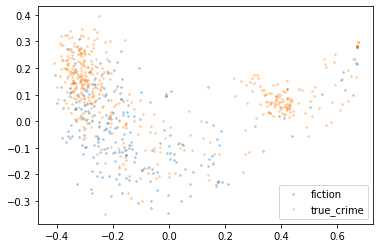

In [29]:
plt.scatter(fiction_embeddings_pcs[:,0],fiction_embeddings_pcs[:,1], alpha=.35, marker='x', s=3, label='fiction')
plt.scatter(true_crime_embeddings_pcs[:,0],true_crime_embeddings_pcs[:,1], alpha=.35, marker='x', s=3, label='true_crime')
plt.legend()
plt.show()

## How good are the embeddings?

At least between true crime and fiction, there's a decent degree of separation. 

Now, as a sanity check to show that the embeddings are actually doing a decent job of separating out different categories and (at a more granular level) different episodes, let's see what the cosine similarity between pairs of episodes looks like.

In [30]:
fiction_embeddings_df

,Unnamed: 0,episode_id,show_id,category,0,1,2,3,4,5,...,374,375,376,377,378,379,380,381,382,383
427,427,6n1sHefqhXOGarTcQ2of1Z,show_02h1SKPgtH0WxWqvqJ7bcx,fiction,-0.007690,-0.003466,-0.023536,0.059110,0.006976,0.085343,...,0.038296,-0.079121,-0.007933,0.010561,-0.014656,0.043663,0.034341,-0.071586,0.011656,0.005514
1523,1523,33ENspLdMcoBryc0z3ZkB9,show_08aevVzSkwp5nzmOKaf4ml,fiction,0.005741,0.062564,-0.048800,0.018725,0.019306,0.001174,...,0.011937,-0.011015,-0.042586,-0.002447,-0.017775,-0.019636,0.103923,-0.026237,-0.094190,0.031583
1524,1524,5r6RpxCeJE1Rora7npULWK,show_08aevVzSkwp5nzmOKaf4ml,fiction,-0.006514,-0.032409,-0.003884,0.055356,0.043287,0.023305,...,-0.040506,-0.041655,-0.021776,-0.028804,-0.020887,0.049328,0.048926,-0.023892,-0.077952,0.002929
2107,2107,1x2vUn4N5pDTGDQbhCHxAy,show_0BhHKinkyoTOMiBWGNSJjK,fiction,-0.008093,0.015541,0.094510,0.015978,-0.001227,-0.059097,...,0.052674,0.051174,-0.020095,0.062772,-0.045337,0.001923,0.068451,-0.041105,-0.052821,0.032391
2108,2108,368wxdIT6zjwGGuV9V7uOg,show_0BhHKinkyoTOMiBWGNSJjK,fiction,-0.011868,0.016492,0.010235,0.005206,0.001610,-0.046519,...,0.108598,0.049806,0.044446,0.033205,-0.068290,0.038397,0.044763,-0.080814,-0.059149,0.044544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36158,36158,3TcbvOLupbYQQ55OuU70mv,show_2QqTj9ppNQejYl3aGhbDQR,fiction,-0.045030,0.011970,0.057297,-0.035945,0.012215,0.041527,...,0.046367,0.055782,-0.021823,0.098970,-0.030872,-0.009647,-0.007753,0.026691,-0.041556,-0.030528
38197,38197,5Kh7pGzOA23kNfoPLoPxRh,show_2VJdQsjBdHSewwRBQGq4pl,fiction,-0.039445,-0.097559,0.021772,-0.011334,0.039341,0.013293,...,0.035993,0.012175,0.004595,0.101847,-0.023665,0.043090,0.080764,0.002782,-0.038981,0.036205
38796,38796,6DIcXe2EokBN2gnZvkQ8bg,show_2xa2B8wxMD1TzOjqApglP3,fiction,-0.012183,-0.109350,0.053084,0.099460,0.063042,0.036828,...,-0.001031,-0.069686,-0.033476,-0.033738,0.000544,0.108347,0.013997,-0.028742,-0.183486,0.045793
38797,38797,54uxd7bZUy8mMGwebaYbr2,show_2xa2B8wxMD1TzOjqApglP3,fiction,0.108131,-0.000282,0.006728,0.099713,-0.009576,-0.003538,...,0.105618,-0.134310,-0.054103,0.059265,-0.051860,0.023231,0.005274,0.024650,-0.102893,-0.055786


In [31]:
# two episodes from different podcasts
episode1 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[0]
episode2 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[1]
cosine_similarity(episode1.values.reshape(1,-1), episode2.values.reshape(1,-1))

array([[0.07189023]])

In [32]:
# episodes from same podcast
episode3 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[2]
cosine_similarity(episode2.values.reshape(1,-1), episode3.values.reshape(1,-1))

array([[0.30672018]])

In [33]:
# two more episodes from the same podcast
episode4 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[3]
episode5 = fiction_embeddings_df[fiction_embeddings_df.columns[4:]].iloc[4]
cosine_similarity(episode4.values.reshape(1,-1), episode5.values.reshape(1,-1))

array([[0.59569334]])

In [34]:
# two from different podcasts
cosine_similarity(episode2.values.reshape(1,-1), episode4.values.reshape(1,-1))

array([[0.13147756]])

These all seem to be working pretty well. Now let's see if we can make a similarity matrix for the whole category.

In [35]:
def get_cosine_sim(df, row1, row2):
    ep1 = df[df.columns[4:]].iloc[row1]
    ep2 = df[df.columns[4:]].iloc[row2]
    return cosine_similarity(ep1.values.reshape(1,-1), ep2.values.reshape(1,-1))

In [36]:
cosine_sims = np.zeros((len(fiction_embeddings_df), len(fiction_embeddings_df)))
for i in tqdm(range(len(fiction_embeddings_df))):
    for j in range(len(fiction_embeddings_df)):
        cosine_sims[i,j] = get_cosine_sim(fiction_embeddings_df, i, j)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 222/222 [00:48<00:00,  4.60it/s]


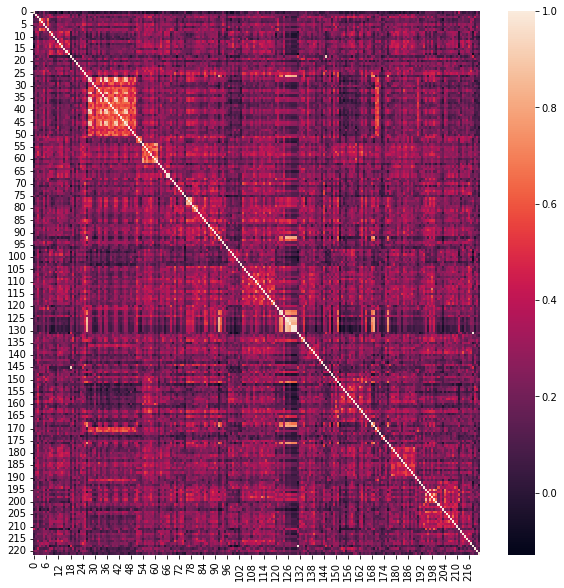

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(cosine_sims)
plt.show()

What about between a pair of categories?

In [38]:
minilm_df.category.value_counts()

sports                       5038
health_and_fitness           4668
education                    4617
comedy                       3877
religion_and_spirituality    3526
business                     3106
society_and_culture          2779
leisure                      2270
arts                         1949
tv_and_film                  1928
kids_and_family              1914
music                        1087
history                       818
science                       655
technology                    600
true_crime                    468
fiction                       222
news                          203
government                     95
Name: category, dtype: int64

In [39]:
fiction_crime_df = minilm_df[minilm_df.category.isin(['true_crime','fiction'])]
fiction_crime_df = fiction_crime_df.sample(200)
fiction_crime_df.sort_values('category',inplace=True)

In [40]:
fiction_crime_cosine_sims = np.zeros((len(fiction_crime_df), len(fiction_crime_df)))
for i in tqdm(range(len(fiction_crime_df))):
    for j in range(len(fiction_crime_df)):
        fiction_crime_cosine_sims[i,j] = get_cosine_sim(fiction_crime_df, i, j)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:39<00:00,  5.13it/s]


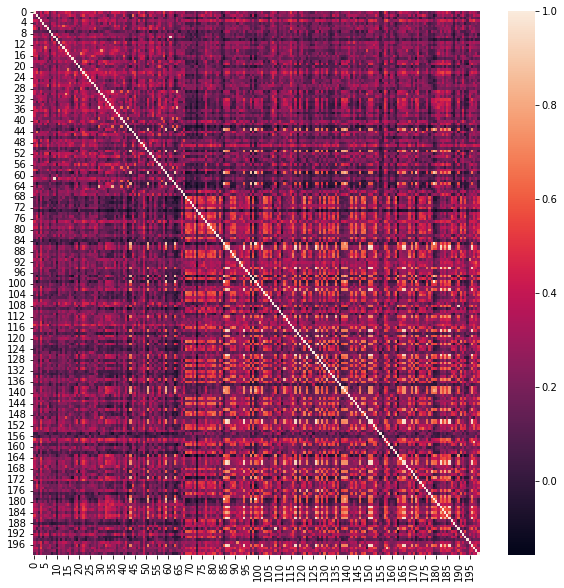

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(fiction_crime_cosine_sims)
plt.show()

We can see a clear boundary point between the two categories of podcasts.

## Pairwise comparisons 

Now let's do this in full! I sampled 50 transcripts from each of the categories and compared the pairwise similarities for same vs. different categories.

In [42]:
sample_size = 50
sampled_categories_df = minilm_df.groupby('category').apply(lambda x: x.sample(sample_size))

In [43]:
import itertools

category_pair_sims = {}

for category_pair in itertools.combinations(sampled_categories_df.category.unique(), 2):
    paired_category_df = sampled_categories_df[sampled_categories_df.category.isin(category_pair)]
    category_pair_sim_matrix = np.zeros((sample_size*2, sample_size*2))
    for i in tqdm(range(len(paired_category_df))):
        for j in range(len(paired_category_df)):
            category_pair_sim_matrix[i,j] = get_cosine_sim(paired_category_df, i, j)
    category_pair_sims[category_pair] = category_pair_sim_matrix

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.03it/s]


In [44]:
np.save('categorypair_sim_matrices.npy',category_pair_sims)

In [45]:
def get_selfsim_diffsim(sim_matrix_dict, category1, category2, sample_size):
    '''
    Takes in the similarity matrix of two different categories and returns the within-category and between-category similarities
    '''
    sim_matrix = sim_matrix_dict[category1, category2]
    
    triu_idx_selfsim = np.triu_indices(sample_size, k=1)
    triu_idx_diffsim = np.triu_indices(sample_size)
    
    cat1_selfsim = np.triu(sim_matrix[:sample_size, :sample_size], k=1)
    cat2_selfsim = np.triu(sim_matrix[sample_size:, sample_size:], k=1)
    
    cat1_selfsim = cat1_selfsim[triu_idx_selfsim]
    cat2_selfsim = cat2_selfsim[triu_idx_selfsim]
    
    cat1_cat2_diffsim = np.triu(sim_matrix[sample_size:, :sample_size])
    cat1_cat2_diffsim = cat1_cat2_diffsim[triu_idx_diffsim]
    
    return {category1:cat1_selfsim, category2:cat2_selfsim, (category1,category2):cat1_cat2_diffsim}

We can compare the distribution of embeddings similarities using a t-test for each pair. I'll be comparing self-similarities to all other episodes within the category with between-category episode comparisons.

In [52]:
from scipy.stats import ttest_ind

ttest_comparisons_tstat = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))
ttest_comparisons_pval = np.zeros((len(sampled_categories_df.category.unique()), len(sampled_categories_df.category.unique())))

for i, category1 in enumerate(sampled_categories_df.category.unique()): 
    for j, category2 in enumerate(sampled_categories_df.category.unique()):
        if i == j:
            ttest_comparisons_tstat[i,j] = 0
            ttest_comparisons_pval[i,j] = 1
        else:
            ordered_categories = tuple(sorted([category1, category2]))
            self_diff_sims = get_selfsim_diffsim(category_pair_sims, ordered_categories[0], ordered_categories[1], sample_size)
            ttest_result = ttest_ind(self_diff_sims[ordered_categories], self_diff_sims[category1], equal_var=False, alternative='less')
            ttest_comparisons_tstat[i,j] = ttest_result.statistic
            ttest_comparisons_pval[i,j] = ttest_result.pvalue

Let's plot these matrices.

In [57]:
colors_tstat = sns.color_palette('BuPu', 6)
levels_tstat = [-10,-2,0,2,10]
cmap_tstat, norm_tstat = from_levels_and_colors(levels_tstat, colors_tstat, extend='both')

colors_pval = sns.color_palette('BuPu',3)
levels_pval = [0,0.05,1]
cmap_pval, norm_pval = from_levels_and_colors(levels_pval, colors_pval, extend='max')

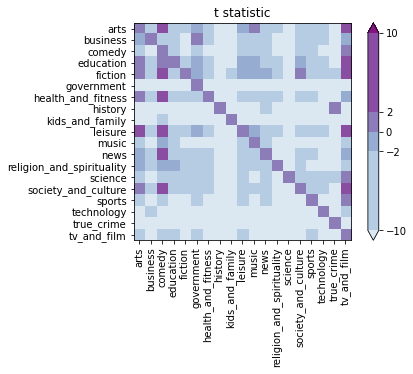

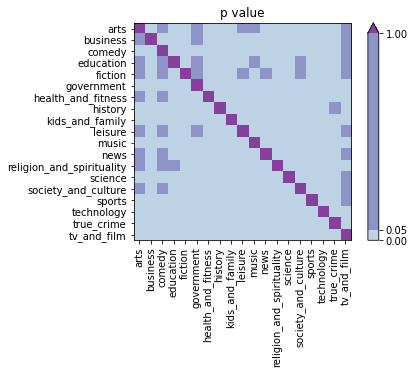

In [58]:
fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_tstat, cmap=cmap_tstat, norm=norm_tstat)
ax.set_xticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique(), rotation=90)
ax.set_yticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique())
fig.colorbar(im,cmap=cmap_tstat, spacing='proportional')
plt.title('t statistic')
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(ttest_comparisons_pval, cmap=cmap_pval, norm=norm_pval)
plt.xticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique(), rotation=90)
plt.yticks(range(len(sampled_categories_df.category.unique())),labels=sampled_categories_df.category.unique())
fig.colorbar(im, cmap=cmap_pval, spacing='proportional')
plt.title('p value')
plt.show()

For the t statistic:
* Blue: cosine similarities between episodes from different categories are on average lower than those between episodes from within the same category (good)
* Purple: cosine similarities between episodes from different categories are on average higher than those between episodes from within the same category (bad)

Overall, the separation is good! 27 pairs aren't significantly different from each other, and there are some that are different in the wrong direction (i.e. different categories more similar than within category), but I don't think this is a dealbreaker. It's easy enough to quantify this category separation.

In [83]:
print('Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:')
# print(f'{np.sum(ttest_comparisons_pval < .05)/ttest_comparisons_tstat.flatten().shape[0]:.3f}')

upper_tri_pvals = ttest_comparisons_pval[np.triu_indices(ttest_comparisons_pval.shape[0], k=1)].flatten()
lower_tri_pvals = ttest_comparisons_pval[np.tril_indices(ttest_comparisons_pval.shape[0], k=-1)].flatten()

np.sum(np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]))/np.concatenate([upper_tri_pvals < .05, lower_tri_pvals < .05]).shape[0]

Proportion of ordered category pairs where within-category cosine similarity > between-category cosine similarity:


0.8830409356725146

Finally, save the IDs of the sampled transcripts for reference.

In [61]:
sampled_categories_df[['episode_id', 'show_id', 'category']].to_csv('sampled_transcript_embeddings.csv')